### Music Mood? Genre? Classifier Testing

hi guys this is nikita lol, i'm just playing around and seeing if i can get things to work how i want them to. I'm gonna keep this in here, feel free to play around with what i'm doing. i'll add in more comments to explain what i'm doing/trying to do but this is just a very simple mood/genre classifier lol

### 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# load and inspect the dataset
data_path = 'data.csv'  
data = pd.read_csv(data_path)

In [3]:
# Basic dataset information
print("Dataset Information:\n")
print(data.info())
print("\nSample Rows:\n", data.head())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null 

In [4]:
# select features and labels
features = data.drop(columns = ['filename', 'label'])
labels = data['label']

In [5]:
# feature engineering: scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
# dimensionality reduction with PCA
pca = PCA(n_components = 2)
pca_features = pca.fit_transform(scaled_features)

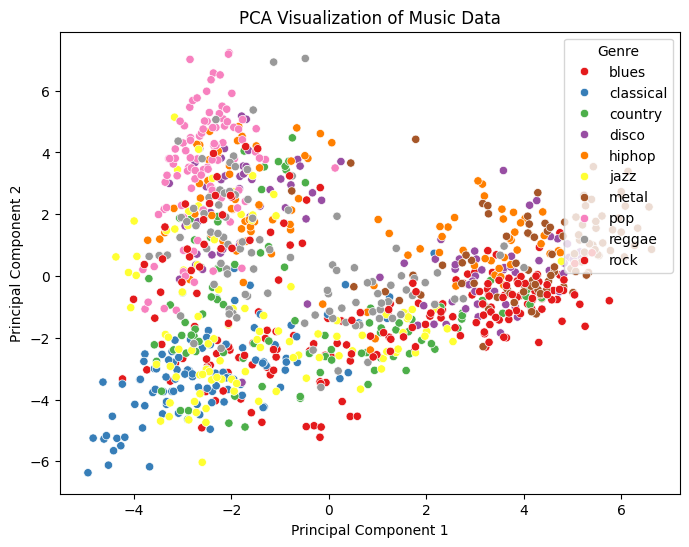

In [7]:
# plot PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x = pca_features[:, 0], y = pca_features[:, 1], hue = labels, palette = "Set1")
plt.title("PCA Visualization of Music Data")
plt.xlabel("Principal Component 1") # Principal Component 1: Represents the direction of maximum variance in the data, capturing the most important patterns.
plt.ylabel("Principal Component 2") # Principal Component 2: Orthogonal to PC1, it captures the second most significant variance, highlighting additional data structure.
plt.legend(title = "Genre", loc = 'upper right')
plt.show()

In [8]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size = 0.2, random_state = 42)

In [9]:
# initializes and trains a Random Forest Classifier
# training a Random Forest Classifier to leverage its ability to handle non-linear relationships, identify important features, and provide robust performance for mood classification.
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# predictions and evaluation
y_pred = rf.predict(X_test)

In [11]:
# displays the confusion matrix to visualize the performance of the classifier by showing the counts of true positive, true negative, false positive, and false negative predictions.
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# prints the classification report to provide detailed metrics such as precision, recall, and F1-score for each class, giving a deeper understanding of model performance.
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# calculates and display the overall accuracy of the model, which is the proportion of correctly predicted samples out of the total.
print("\nAccuracy:", accuracy_score(y_test, y_pred))



Confusion Matrix:
 [[13  0  2  1  1  1  2  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 2  0 13  0  3  5  0  1  1  2]
 [ 0  0  1  8  2  0  0  4  1  5]
 [ 0  0  1  1  9  0  0  1  2  1]
 [ 1  3  4  0  1 11  0  0  1  1]
 [ 0  0  0  0  2  0 21  0  0  2]
 [ 0  0  1  0  0  0  0 11  1  0]
 [ 1  0  3  0  5  3  0  0  9  2]
 [ 3  0  5  0  1  0  5  1  2  4]]

Classification Report:
               precision    recall  f1-score   support

       blues       0.65      0.65      0.65        20
   classical       0.81      1.00      0.90        13
     country       0.43      0.48      0.46        27
       disco       0.80      0.38      0.52        21
      hiphop       0.38      0.60      0.46        15
        jazz       0.55      0.50      0.52        22
       metal       0.75      0.84      0.79        25
         pop       0.61      0.85      0.71        13
      reggae       0.53      0.39      0.45        23
        rock       0.24      0.19      0.21        21

    accuracy                

In [12]:
# gets and ranks feature importance scores from the Random Forest model in descending order.
# feature importance visualization
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1] # feature importance visualization
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

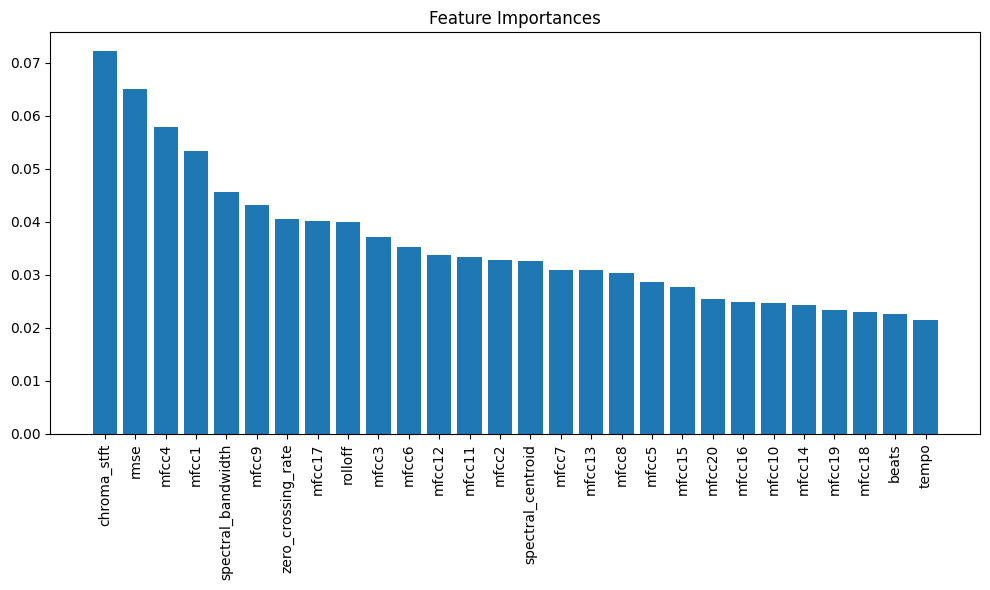

In [13]:
# plots a bar chart to visualize the importance of each feature as determined by the Random Forest model.
plt.figure(figsize = (10, 6))
plt.title("Feature Importances")
plt.bar(range(features.shape[1]), importances[indices], align = "center")
plt.xticks(range(features.shape[1]), features.columns[indices], rotation = 90)
plt.tight_layout()
plt.show()


In [14]:
# performs hyperparameter tuning for the Random Forest model using GridSearchCV to optimize performance.
# hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [15]:
print("\nBest Parameters:\n", grid_search.best_params_)
print("\nBest Grid Search Accuracy:", grid_search.best_score_)


Best Parameters:
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best Grid Search Accuracy: 0.6524738813325449


In [16]:
# retrains with best parameters
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

In [17]:
print("\nFinal Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nFinal Classification Report:\n", classification_report(y_test, y_pred_best))
print("\nFinal Accuracy:", accuracy_score(y_test, y_pred_best))


Final Confusion Matrix:
 [[15  0  1  0  1  0  2  0  0  1]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 2  0 15  0  1  4  0  1  2  2]
 [ 0  0  1  9  2  0  0  4  1  4]
 [ 0  0  1  0  8  0  0  2  3  1]
 [ 1  3  3  0  0 12  0  0  1  2]
 [ 0  0  0  2  2  0 21  0  0  0]
 [ 0  0  1  0  0  0  0 11  1  0]
 [ 1  1  3  0  5  2  0  0 10  1]
 [ 3  0  3  0  0  1  5  1  2  6]]

Final Classification Report:
               precision    recall  f1-score   support

       blues       0.68      0.75      0.71        20
   classical       0.76      1.00      0.87        13
     country       0.54      0.56      0.55        27
       disco       0.82      0.43      0.56        21
      hiphop       0.42      0.53      0.47        15
        jazz       0.63      0.55      0.59        22
       metal       0.75      0.84      0.79        25
         pop       0.58      0.85      0.69        13
      reggae       0.50      0.43      0.47        23
        rock       0.35      0.29      0.32        21

    accuracy    

In [18]:
# save results, basically shows that what the model predicted as the genre vs the True Label of the genre 
output_path = 'classification_results.csv'
pd.DataFrame({'True Label': y_test, 'Predicted Label': y_pred_best}).to_csv(output_path, index = False)
print(f"Classification results saved to {output_path}")


Classification results saved to classification_results.csv


TA DA lol